Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [4]:
import pandas as pd
import os
os.chdir('C:\\Users\\Андрей Клычев')


__offer_gk__ - номер заявки  
__weekday_key__ - день недели (0-6)  
__hour_key__- время (0-23)  
__driver_gk__ - номер водителя  
__order_gk__- номер заказа  
__driver_latitude__ - текущая широта водителя  
__driver_longitude__ - текущая долгота водителя  
__origin_order_latitude__ - текущая широта клиента  
__origin_order_longitude__ - текущая долгота клиента  
__distance, km__ - длина маршрута  
__duration_min__ - длительность поездки  
__offer_class_group__ - тип заказа  
__ride_type_desc__ - тип заявителя  
__driver_response__ - решение водителя  

In [43]:

data = pd.read_csv('taxi.csv')
data

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,Economy,private,0
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,Economy,private,0
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,Standard,private,0
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,Economy,private,0


In [6]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [7]:
data.isna().count()

offer_gk                  100000
weekday_key               100000
hour_key                  100000
driver_gk                 100000
order_gk                  100000
driver_latitude           100000
driver_longitude          100000
origin_order_latitude     100000
origin_order_longitude    100000
distance_km               100000
duration_min              100000
offer_class_group         100000
ride_type_desc            100000
driver_response           100000
dtype: int64

In [8]:
len(data.order_gk.unique())

81435

In [7]:
import pandas_profiling as pp

In [8]:
pp.ProfileReport(data)

D:\Anaconda\envs\myenv\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,100000
Total Missing (%),0.0%
Total size in memory,10.7 MiB
Average record size in memory,112.0 B
Numeric,9
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,2


Для начала избавимся от лишних параметров, например, 'offer_gk', 'duration_min'  
(длительность поездки имеет сильную корреляцию с параметром 'distance', поэтому от него тоже избавимся)  
Значения широты и долготы трансформируем в расстояние от водителя до клиента, заменив тем самым 4 столбца на 1

In [9]:
def dist_count(row):
    diff_long = row.driver_longitude - row.origin_order_longitude
    diff_lat = row.driver_latitude - row.origin_order_longitude
    y = abs(20004.274/180*diff_long)
    x = abs(62.5*diff_lat)
    return round((x**2 + y**2)**(1/2)/1000, 2)

In [44]:
# Удаляем ошибочные координаты
data = data.loc[(data.driver_latitude > 55) & (data.driver_longitude > 37) \
                & (data.origin_order_latitude > 55) & (data.driver_longitude > 37) & (data.distance_km >= 0) &\
               (data.duration_min >= 0)]
len(data)

73760

In [45]:
data['dist_between'] = data.apply(dist_count, axis=1)
data

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,dist_between
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,1.15
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,1.15
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,1.14
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0,1.15
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,Economy,private,0,1.16
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,Economy,private,0,1.16
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,Standard,private,0,1.16
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,Economy,private,0,1.16


Удаляем избыточные и сильно кореллирующие с другими признаки

In [46]:
data = data.drop(['driver_longitude', 'driver_latitude', 'origin_order_longitude', 'origin_order_latitude',\
                 'offer_gk', 'order_gk', 'driver_gk', 'duration_min'], axis=1)
data

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,dist_between
1,5,14,18.802,Standard,private,1,1.15
2,6,14,6.747,Economy,private,0,1.15
4,4,16,12.383,Economy,private,1,1.14
5,6,15,6.747,Economy,private,0,1.15
7,5,20,1.517,Economy,private,0,1.16
...,...,...,...,...,...,...,...
99995,0,2,17.378,Economy,private,0,1.16
99996,0,1,7.751,Economy,private,0,1.16
99997,1,20,46.983,Standard,private,0,1.16
99998,6,21,50.029,Economy,private,0,1.16


Сделаем самую простую перекодирвку признаков и проверим с помощьюалгоритма деревьев решений, какие признаки оказывают  
наибольшее влияние на отказ от заказа

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# driver_num = encoder.fit_transform(data.driver_gk)
offer_tr = encoder.fit_transform(data.offer_class_group)
ride_tr = encoder.fit_transform(data.ride_type_desc)

In [48]:
data_tr = data.copy(deep=True)


In [49]:
# data_tr.driver_gk = driver_num
data_tr.offer_class_group = offer_tr
data_tr.ride_type_desc = ride_tr
data_tr

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,dist_between
1,5,14,18.802,4,2,1,1.15
2,6,14,6.747,1,2,0,1.15
4,4,16,12.383,1,2,1,1.14
5,6,15,6.747,1,2,0,1.15
7,5,20,1.517,1,2,0,1.16
...,...,...,...,...,...,...,...
99995,0,2,17.378,1,2,0,1.16
99996,0,1,7.751,1,2,0,1.16
99997,1,20,46.983,4,2,0,1.16
99998,6,21,50.029,1,2,0,1.16


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_tr.drop(['driver_response'], axis=1), data_tr['driver_response']\
                                                   ,train_size=0.3)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

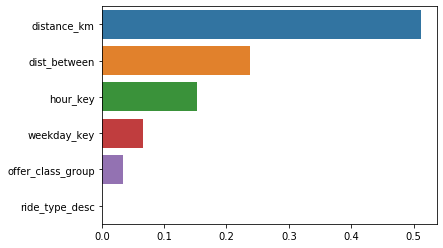

In [52]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
feature_imp = pd.Series(model.feature_importances_, index=x_train.columns.values).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

Результат вполне логичен, в отсутствии цены за заказ в качестве признака, действительно, расстояния будут  
играть ключевую роль

Чтож, может стоит разбить признаки на дополнительные подпризнаки? Посмотрим, возможно и точность классификации увеличится

In [20]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [21]:
hot = OneHotEncoder()

In [23]:
d = np.array(data.driver_gk).reshape(-1, 1)
o = np.array(data.offer_class_group).reshape(-1, 1)
r = np.array(data.ride_type_desc).reshape(-1, 1)
h = np.array(data.hour_key).reshape(-1, 1)
w = np.array(data.weekday_key).reshape(-1, 1)
# driver_numh = hot.transform(d).toarray()
offer_trh = pd.DataFrame(hot.fit_transform(o).toarray(), columns=data.offer_class_group.unique())
ride_trh = pd.DataFrame(hot.fit_transform(r).toarray(), columns=data.ride_type_desc.unique())
hour_trh = pd.DataFrame(hot.fit_transform(h).toarray(), columns=data.hour_key.unique())
weekday_trh = pd.DataFrame(hot.fit_transform(w).toarray(), columns=data.weekday_key.unique())

In [24]:
data_tr = pd.concat([data_tr, offer_trh, ride_trh, hour_trh, weekday_trh], axis=1)


data_tr = data_tr.drop(['driver_gk', 'offer_class_group', 'ride_type_desc', 'weekday_key', 'hour_key'], axis=1)
# data_tr.offer_class_group = offer_trh
# data_tr.ride_type_desc = ride_trh
# data_tr.hour_key = hour_trh
# data.weekday_key = weekday_trh

In [25]:
data_tr = data_tr.dropna()
xh_train, xh_test, yh_train, yh_test = train_test_split(data_tr.drop(['driver_response'], axis=1), data_tr['driver_response']\
                                                   ,train_size=0.3)

In [26]:
modelh = RandomForestClassifier(n_estimators=100)
modelh.fit(xh_train, yh_train)

RandomForestClassifier()

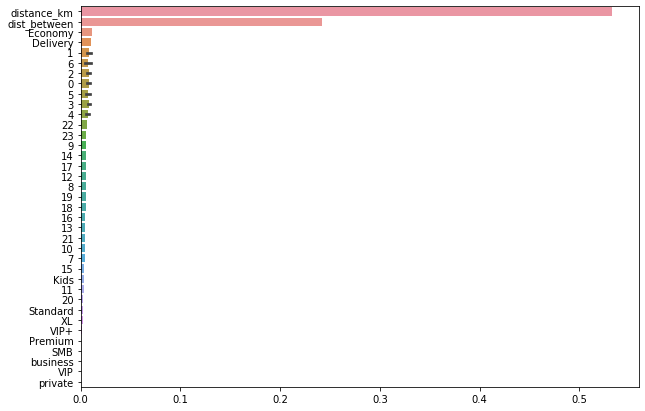

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]
feature_imph = pd.Series(modelh.feature_importances_, index=xh_train.columns.values).sort_values(ascending=False)
sns.barplot(x=feature_imph, y=feature_imph.index)
plt.show()

In [28]:
from sklearn.metrics import classification_report
model_pred = model.predict(x_test)
print(classification_report(model_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     25794
           1       0.79      0.75      0.77     25838

    accuracy                           0.77     51632
   macro avg       0.78      0.77      0.77     51632
weighted avg       0.78      0.77      0.77     51632



In [29]:
modelh_pred = modelh.predict(xh_test)
print(classification_report(modelh_pred, yh_test))

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69     20504
         1.0       0.64      0.65      0.64     17954

    accuracy                           0.67     38458
   macro avg       0.66      0.66      0.66     38458
weighted avg       0.67      0.67      0.67     38458



Разбитие на подпризнаки дало громоздкий и менее точный результат, но из него видно, как превальируют факторы расстояния на  
всеми прочими, на них водители похоже и не смотрят

Интересно посмотреть каккую точность покажет классификатор на основе градиентного спуска

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
modelh = GradientBoostingClassifier(random_state=0)

In [53]:
modelh.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [55]:
pred_gb = modelh.predict(x_test)

In [56]:
modelh.score(x_test, y_test)

0.7516656337155253

Получился в целом схожий результат с клаассификатором типа "случайный лес"